In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [5]:
train_df = pd.read_csv('titanic-train.csv')
test_df = pd.read_csv('titanic-test.csv')
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Distribución de personas')

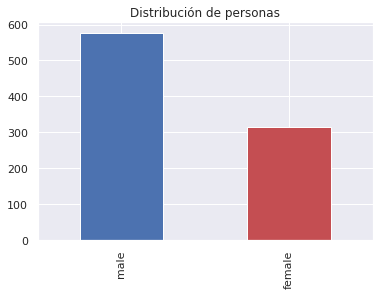

In [6]:
train_df.Sex.value_counts().plot(kind = 'bar', color= ['b', 'r'])
plt.title('Distribución de personas')

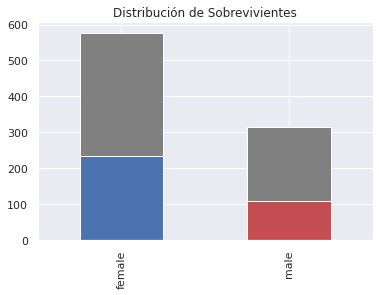

In [7]:
train_df.Sex.value_counts().plot(kind='bar', color=['grey', 'grey'])
train_df[train_df.Survived == 1].Sex.value_counts().plot(kind='bar', color=['b', 'r'])
plt.title('Distribución de Sobrevivientes')
plt.show()


Text(0.5, 1.0, 'Distribucion de sobrevivientes')

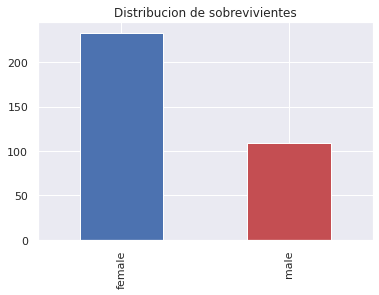

In [10]:
train_df[ train_df['Survived'] == 1 ]['Sex'].value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de sobrevivientes')

Cuando se llenan los espacios con vacíos (fillna), para el caso de datos numéricos se utiliza la mediana porque es una de las medidas de tendencia central que menos se afecta por los datos atípicos.

Para el caso de los datos categóricos relacionados con el embarque, se utiliza la letra S porque representa el embarque en la ciudad de South Hampton, en donde más personas se unieron al viaje.

Estos datos se obtienen de un análisis previo a los datos trabajados.

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df['Sex'] =encoder_sex
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')


In [14]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
categorical_cols = [cname for cname in train_predictors.columns if train_predictors[cname].nunique() < 10 and train_predictors[cname].dtype == 'object'
                    
                    ]

In [15]:
numerical_cols = [ cname for cname in train_predictors.columns if train_predictors[cname].dtype in ['int64', 'float64'] 
                  ]

In [16]:
my_cols = categorical_cols + numerical_cols
train_predictors = train_predictors[my_cols]

In [17]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [18]:
train_df['Pclass'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

In [29]:
y_target = train_df['Survived'].values
x_features_ones = dummy_encoded_train_predictors.values

In [30]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_ones, y_target, test_size = 0.25, random_state = 1)

In [31]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [34]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4)
print(tree_one_accuracy)

0.7489


Varias cosas que creo son importantes aclarar y que he podido aprender por mi parte:

1.- Lo ya mencionado en otros comentarios: Entiendo que fue un error haber entrenado y luego evaluado el estimador (en este caso el árbol de decisión) con los mismos datos y haber hecho caso omiso de los splits hechos con train_test_split. Esto explica el valor tan alto de exactitud (accuracy) que dio el modelo al final; seguramente hubo un overfitting (encima porque no se usó ningún parámetro de regularización como max_depth (más al respecto)) y el modelo terminó memorizando los datos. Sin un X_test para evaluar es difícil saber si el modelo será bueno para predecir nuevas observaciones. De hecho, tal como el mismo sitio de sklearn lo menciona , los árboles de no suelen generalizar bien y tienden a sobreajustarse a los datos de entrenamiento.

2.- De los cursos de ML de platzi que he visto no he podido ver una clase que aborde las diferentes métricas que hay para evaluar el desempeño del modelo, y es algo muy importante. Para clasificadores sólo he visto que muestren accuracy, siendo que NO siempre es la mejor métrica para evaluar un modelo.

Lo anterior lo menciono porque en el minuto 4:40, la profesora da a entender que el accuracy está relacionado con la probabilidad de que el estimador acierte correctamente una predicción, pero sería bueno aclarar que esto no es del todo cierto, sobre todo con datasets con class imbalance (donde el número de observaciones de cada clase no es uniforme). Una métrica más acertada sería el roc_auc_score (el área bajo la curva ROC). (Más info: )


https://stats.stackexchange.com/questions/312780/why-is-accuracy-not-the-best-measure-for-assessing-classification-models

In [35]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True

Se obtiene el árbol pero hubiese sido interesante se analizara el árbol y mencionar cosas al menos ligeramente sobre el indice de Gini que es el que por defecto asume sklearn, pero también se hubiera podido usar “entropy” para hablar del Gain_info. tambien faltó mencionar que una vez obtenido se puede pensar en hacer una “poda” del árbol que mejore el modelo. y de los diagramas de complejidad que te permite ayudarte en este proceso.